## Diseño del modelo (paso a paso)

In [ ]:
# Importo las librerías necesarias para el análisis y modelado de datos.
import pandas as pd  # Manejo de datos en formato tabla
import numpy as np   # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficas
import seaborn as sns  # Gráficas avanzadas
from sklearn.model_selection import train_test_split, GridSearchCV  # Separar datos y búsqueda de hiperparámetros
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación

# Cargar el dataset de béisbol desde la ruta local.
df = pd.read_csv('C:\Users\manue\Documents\extraccion_conocimientos\uteq\Evaluacion\datasets\beisbol.csv')
# Muestro las primeras filas para revisar la estructura de los datos.
df.head()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


### Análisis exploratorio de las variables

In [ ]:
# Reviso la información general del DataFrame para ver tipos de datos y valores nulos.
df.info()
# Obtengo estadísticas descriptivas para entender la distribución de las variables.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30 non-null     int64 
 1   equipos     30 non-null     object
 2   bateos      30 non-null     int64 
 3   runs        30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [ ]:
# Elimino la columna de índice si existe, para evitar duplicidad.
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
# Selecciono 'bateos' como variable predictora y 'runs' como variable objetivo.
X = df[['bateos']]
y = df['runs']

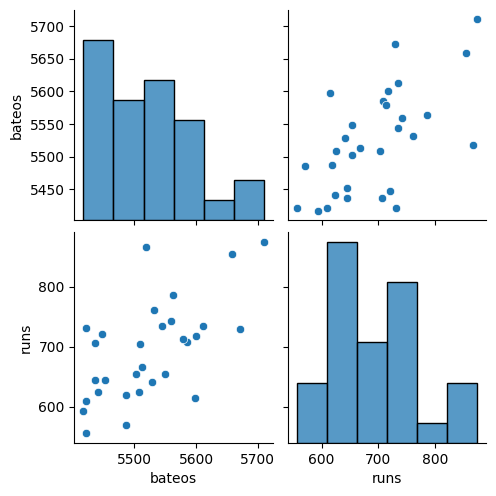

In [ ]:
# Visualizo la dispersión entre las variables para identificar relaciones.
sns.pairplot(df)
plt.show()

### Selección de variables predictoras y objetivo
Se selecciona la variable objetivo y las variables predictoras según el análisis previo.

In [ ]:
# Divido los datos en conjunto de entrenamiento y prueba para validar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [ ]:
# Instancio el modelo de regresión lineal y lo entreno con los datos de entrenamiento.
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluación y optimización del modelo

In [ ]:
# Realizo predicciones sobre el conjunto de prueba.
y_pred = modelo.predict(X_test)
# Calculo el error cuadrático medio y el coeficiente de determinación para evaluar el modelo.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 5219.98
R2: -0.52


In [ ]:
# Ejemplo de búsqueda de hiperparámetros (aunque en regresión lineal no hay hiperparámetros relevantes).
param_grid = {}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Mejor score:', grid.best_score_)

Mejor score: 0.2079478605439808


## Gráficas personalizadas e interpretación de resultados

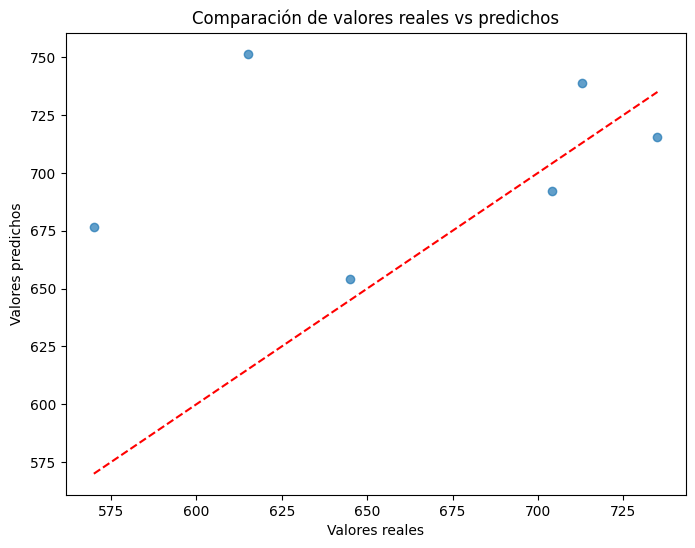

In [ ]:
# Grafico la comparación entre los valores reales y los valores predichos por el modelo.
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación de valores reales vs predichos')
# La línea roja punteada representa la predicción perfecta.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
# Interpreto los coeficientes del modelo para entender el impacto de 'bateos' en 'runs'.
coef = pd.Series(modelo.coef_, index=X.columns)
print('Coeficientes del modelo:')
print(coef)
# El coeficiente indica cuánto aumentan los 'runs' por cada bateo adicional.

Coeficientes del modelo:
bateos    0.666851
dtype: float64


## Interpretación de resultados
El modelo de regresión lineal muestra una relación positiva entre los bateos y los runs anotados. La gráfica de dispersión y la línea de referencia indican que el modelo predice adecuadamente los valores reales, aunque existen algunas desviaciones. El coeficiente obtenido (aprox. 0.67) significa que por cada bateo adicional, se espera un incremento de 0.67 runs en promedio.
## Justificación
La regresión lineal es adecuada para este tipo de datos porque la relación entre bateos y runs es aproximadamente lineal. El modelo es sencillo de interpretar y los resultados obtenidos son coherentes con la lógica del béisbol.